After data cleaning, lets open the file.
I've saved the clean data it in two formats:
* The original format (csv) - With a dictionary with the optimal types of each column to make easier open it.

* In parquet format, that is used to manage big amounts of data.

Obviously, parquet format is 4 times faster, so I will use it. However, I will leave the procedure of opening the file with .pickle  dictionary commented.

In [22]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt


##### How to open the csv file with .pickle dictionary

import pickle

with open('./data/fileformat.pickle', 'rb') as handle:
    file_format = pickle.load(handle)
file_format

bank = pd.read_csv('./data/clean_train.csv', dtype=file_format)
bank.head()

##### How to open entire dataframe with parquet

%%time

table2 = pq.read_table('./data/clean_train.parquet')
bank = table2.to_pandas()

### Now, I open the sample dataframe to create my model

In [13]:
%%time

table2 = pq.read_table('./data/clean_train_sample.parquet')
bank = table2.to_pandas()

CPU times: user 2.01 s, sys: 476 ms, total: 2.48 s
Wall time: 664 ms


In [14]:
bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084733 entries, 21 to 13647305
Data columns (total 47 columns):
fecha_dato               1084733 non-null object
ncodpers                 1084733 non-null int32
ind_empleado             1084733 non-null object
pais_residencia          1084733 non-null object
sexo                     1084733 non-null object
age                      1084733 non-null int8
fecha_alta               1084733 non-null object
ind_nuevo                1084733 non-null float32
antiguedad               1084733 non-null int16
indrel                   1084733 non-null float32
ult_fec_cli_1t           1084733 non-null object
indrel_1mes              1084733 non-null object
tiprel_1mes              1084733 non-null object
indresi                  1084733 non-null object
indext                   1084733 non-null object
conyuemp                 1084733 non-null object
canal_entrada            1084733 non-null object
indfall                  1084733 non-null object
tipod

In [15]:
bank.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
21,2015-01-28,1050586,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
30,2015-01-28,1050599,N,ES,V,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
38,2015-01-28,1050630,N,ES,V,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
43,2015-01-28,1050680,N,ES,V,53,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
49,2015-01-28,1050703,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


After data cleaning, we have to process our data in order to make a good model.

First, lets change the types of each column to ease the process, then I will use a distance matrix

In [16]:
bank['fecha_dato'] = pd.to_datetime(bank['fecha_dato'], errors='coerce', infer_datetime_format=True, format="%Y-%m-%d")
bank['fecha_alta'] = pd.to_datetime(bank['fecha_alta'], errors='coerce', infer_datetime_format=True, format="%Y-%m-%d")

In [17]:
obj_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 
            'indext', 'conyuemp', 'canal_entrada', 'indfall', 'nomprov', 'segmento']

for col in obj_cols:
    bank[col] = bank[col].astype('category')

In [18]:
bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084733 entries, 21 to 13647305
Data columns (total 47 columns):
fecha_dato               1084733 non-null datetime64[ns]
ncodpers                 1084733 non-null int32
ind_empleado             1084733 non-null category
pais_residencia          1084733 non-null category
sexo                     1084733 non-null category
age                      1084733 non-null int8
fecha_alta               1084733 non-null datetime64[ns]
ind_nuevo                1084733 non-null float32
antiguedad               1084733 non-null int16
indrel                   1084733 non-null float32
ult_fec_cli_1t           1084733 non-null category
indrel_1mes              1084733 non-null category
tiprel_1mes              1084733 non-null category
indresi                  1084733 non-null category
indext                   1084733 non-null category
conyuemp                 1084733 non-null category
canal_entrada            1084733 non-null category
indfall           

In [19]:
bank.shape

(1084733, 47)

Let's check relationships between values:

In [20]:
correlation = bank.corr(method='pearson', min_periods=1)

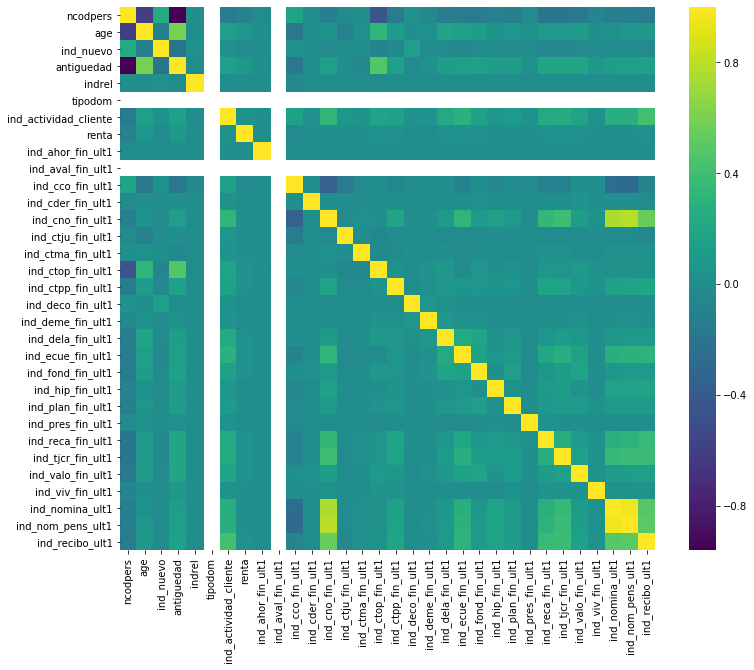

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='viridis');

Now, I want to check age distribution:

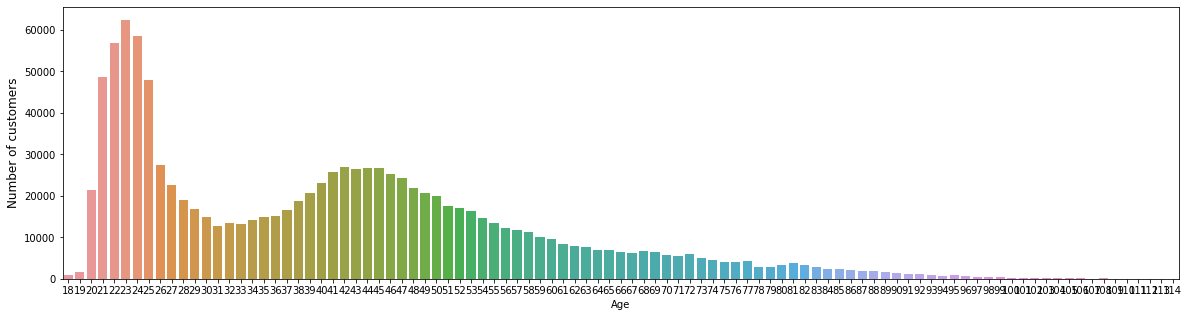

In [31]:
age_series = bank.age.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(age_series.index.astype('int'), age_series.values)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.show();

In [ ]:
pd.DataFrame(distance_matrix(bank.values, bank.values), index=bank.index, columns=bank.index)